In [1]:
import bogo as bg
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.special import factorial as fac

mu = 0.99
M = np.array([[1,-mu],[-mu,1]])

na = np.array([0,2])
nb = np.array([0,2])
nA = np.array([1,1])

prod_ab = bg.ab(na,nb,M)
# prod_bA = bg.bA(nb,nA,M)
# prod_aA = bg.aA(na,nA,M)

print(prod_ab)
# print(prod_bA)
# print(prod_aA)




0.4999999999999999


In [3]:
ma = np.array([0,2])
mb = np.array([0,2])
t0 = time.time()
prod_ab = bg.ab(ma,mb,M)
# prod_bA = bg.bA(nb,nA,M)
# prod_aA = bg.aA(na,nA,M)
t1 = time.time()

print(prod_ab)
print("Time = {}".format(t1-t0))

0.4999999999999999
Time = 0.0


Here some known results using v1,v3 for ab:

ab([0,2],[0,2])=0.5

ab([0,0],[0,0])=1

ab([2,1],[0,3])=-0.6123724356957946

ab([2,4],[5,1])=-0.3952847075210471

ab([4,4],[4,4])=0.375

Here some known results using v2,v3 for ab:

ab([0,2],[0,2])=0.5

ab([0,0],[0,0])=1

ab([2,1],[0,3])=-0.6123724356957946

ab([2,4],[5,1])=-0.3952847075210471

ab([4,4],[4,4])=0.375

The time spent for each computed value is on your notes.

Let's add the multipermute package made by Joe and see how it's its performance:

Time ab([0,2],[0,2])=0.0009980201721191406

Time ab([0,0],[0,0]) --> Error: index 0 is out of bounds for axis 0 with size 0

Time ab([2,1],[0,3])=0.001004934310913086

Time ab([2,4],[5,1])=0.0010018348693847656

Time ab([4,4],[4,4])=0.0049974918365478516 <-- From this point this is an improvement with respect to the previous code!

Time ab([6,6],[10,2])=0.004355669021606445

Time ab([20,0],[10,10])=12.460918426513672

By modifying the ab function (including by hand the ground-ground case) the error doesn't appear anymore.

ab([0,0],[0,0])=1.0
Time ab([0,0],[0,0]) = 0.0010008811950683594

[ 0  0 13]
[ 0  1 12]
[ 0  2 11]
[ 0  3 10]
[0 4 9]
[0 5 8]
[0 6 7]
[0 7 6]
[0 8 5]
[0 9 4]
[ 0 10  3]
[ 0 11  2]
[ 0 12  1]
[ 0 13  0]
[ 1  0 12]
[ 1  1 11]
[ 1  2 10]
[1 3 9]
[1 4 8]
[1 5 7]
[1 6 6]
[1 7 5]
[1 8 4]
[1 9 3]
[ 1 10  2]
[ 1 11  1]
[ 1 12  0]
[ 2  0 11]
[ 2  1 10]
[2 2 9]
[2 3 8]
[2 4 7]
[2 5 6]
[2 6 5]
[2 7 4]
[2 8 3]
[2 9 2]
[ 2 10  1]
[ 2 11  0]
[ 3  0 10]
[3 1 9]
[3 2 8]
[3 3 7]
[3 4 6]
[3 5 5]
[3 6 4]
[3 7 3]
[3 8 2]
[3 9 1]
[ 3 10  0]
[4 0 9]
[4 1 8]
[4 2 7]
[4 3 6]
[4 4 5]
[4 5 4]
[4 6 3]
[4 7 2]
[4 8 1]
[4 9 0]
[5 0 8]
[5 1 7]
[5 2 6]
[5 3 5]
[5 4 4]
[5 5 3]
[5 6 2]
[5 7 1]
[5 8 0]
[6 0 7]
[6 1 6]
[6 2 5]
[6 3 4]
[6 4 3]
[6 5 2]
[6 6 1]
[6 7 0]
[7 0 6]
[7 1 5]
[7 2 4]
[7 3 3]
[7 4 2]
[7 5 1]
[7 6 0]
[8 0 5]
[8 1 4]
[8 2 3]
[8 3 2]
[8 4 1]
[8 5 0]
[9 0 4]
[9 1 3]
[9 2 2]
[9 3 1]
[9 4 0]
[10  0  3]
[10  1  2]
[10  2  1]
[10  3  0]
[11  0  2]
[11  1  1]
[11  2  0]
[12  0  1]
[12  1  0]
[13  0  0]


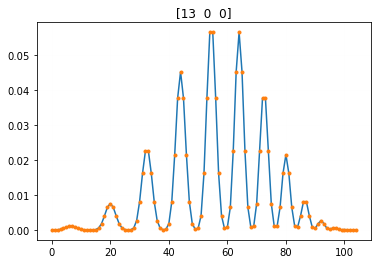

In [19]:
na = np.array([13,0,0])
nbs = bg.n_subspace(len(na),np.sum(na))
matrix = np.array([[1,-mu,0],[-mu,1+mu,-mu],[0,-mu,1]])
res = []
for nb in nbs:
#     print(nb)
#     print(bg.ab(na,nb,matrix))
    res.append(bg.ab(na,nb,matrix)**2)

plt.plot(res)
plt.plot(res,'.')
plt.grid(alpha=0.002)
plt.title('{}'.format(na))
plt.show()



[[ 0  0 13]
 [ 0  1 12]
 [ 0  2 11]
 [ 0  3 10]
 [ 0  4  9]
 [ 0  5  8]
 [ 0  6  7]
 [ 0  7  6]
 [ 0  8  5]
 [ 0  9  4]
 [ 0 10  3]
 [ 0 11  2]
 [ 0 12  1]
 [ 0 13  0]]
[6.27225474e-07 8.15393117e-06 4.89235870e-05 1.79386486e-04
 4.48466214e-04 8.07239186e-04 1.07631891e-03 1.07631891e-03
 8.07239186e-04 4.48466214e-04 1.79386486e-04 4.89235870e-05
 8.15393117e-06 6.27225474e-07]


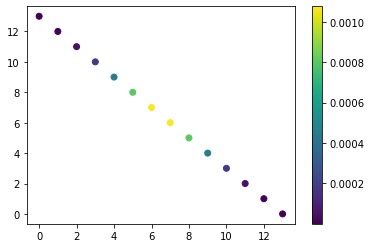

In [31]:
print(nbs[nbs[:,0]==0])
print(np.array(res)[nbs[:,0]==0])
A = nbs[nbs[:,0]==0]
x = A[:,1]
y = A[:,2]
z = np.array(res)[nbs[:,0]==0]


plt.scatter(x,y,c=z)
plt.colorbar()
plt.show()

In [9]:
res = np.array(res)
print(len(res[res<1e-10]))

0


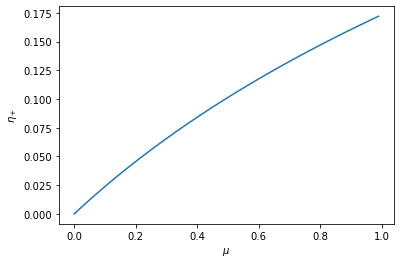

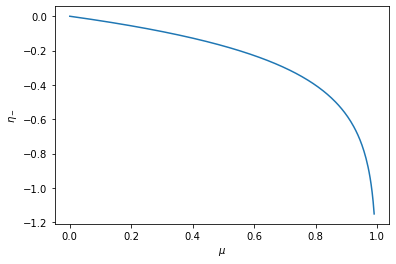

In [2]:
Mu = np.linspace(0,0.99,300)
omega_p = np.sqrt(Mu+1)
omega_m = np.sqrt(1-Mu)
eta_p = np.arctanh((omega_p-1)/(omega_p+1))
eta_m = np.arctanh((omega_m-1)/(omega_m+1))

plt.plot(Mu,eta_p)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\eta_+$')
plt.show()
plt.plot(Mu,eta_m)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\eta_-$')
plt.show()

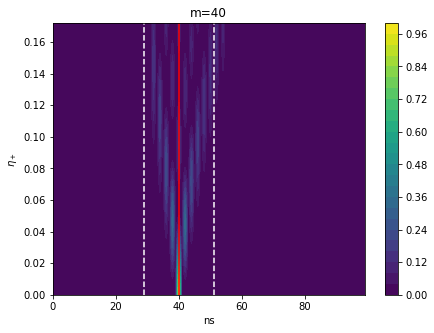

In [4]:
m = 40
ns = np.arange(0,100)

NS,ETA = np.meshgrid(ns,eta_p)

PROB = (np.vectorize(bg.fast_single)(m,NS,ETA))**2

plt.figure(figsize=(7,5))

plt.contourf(ns,eta_p,PROB,levels=30)
plt.ylabel(r'$\eta_+$')

plt.xlabel('ns')
plt.colorbar()
plt.title('m={}'.format(m))

plt.vlines(m,np.min(eta_p),np.max(eta_p),'red')
plt.vlines(m+0.25*m+1,np.min(eta_p),np.max(eta_p),'white',linestyle='dashed')
plt.vlines(m-(0.25*m+1),np.min(eta_p),np.max(eta_p),'white',linestyle='dashed')

plt.show()

In [ ]:
m = 50
ns = np.arange(0,100)

NS,ETA = np.meshgrid(ns,eta_m)

PROB = (np.vectorize(bg.fast_single)(m,NS,ETA))**2

plt.figure(figsize=(7,5))

# plt.contourf(ns,-eta_m,PROB,levels=30)
plt.contourf(ns,-eta_m,PROB,levels=30)
plt.ylabel(r'$-\eta_-$')

plt.xlabel('ns')
plt.colorbar()
plt.title('m={}'.format(m))

plt.vlines(m,np.max(eta_m),-np.min(eta_m),'red')
plt.vlines(m+20,np.max(eta_m),-np.min(eta_m),'white',linestyle='dashed')
plt.vlines(m-20,np.max(eta_m),-np.min(eta_m),'white',linestyle='dashed')

plt.show()

For the squeezing step in the 2 oscillators case in one of the modes the squeezing parameter is negative (there when omega=sqrt(1-mu)). In that case the number distribution for the possible values of eta is not concentrated near to the  original value, as it happens for the case where omega=sqrt(1+mu). The plots obtained in the cell above show this behaviour.

When eta_p is selected the plot shows how the distribution is centered around the red line and bounded by the dashed lines for general values of m. When eta_m is selected the distribution splits in two lines that go far from the center, making that most of the number distribution lays out of the boundaries. 

C:\Users\Eric\bogo\src\bogo.py:52: RuntimeWarning: overflow encountered in double_scalars
  prefactor = (np.sqrt(fac(m)*fac(n)))/((np.cosh(eta))**((n+m+1)/2))


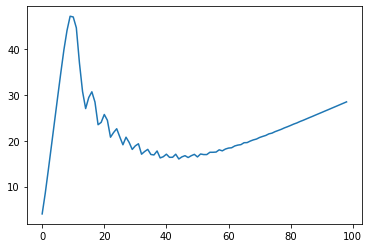

In [18]:
Eta_m = np.min(eta_m)
ms = np.arange(0,100)
ns = np.arange(0,100)
Var = []

for m in ms:
    dist = (np.vectorize(bg.single)(m,ns,Eta_m))**2
    var = np.dot((ns-m)**2,dist)
    Var.append(var)

Var = np.sqrt(np.array(Var))

# plt.plot(ms[ms<20],Var[ms<20])
plt.plot(ms,Var)
# plt.plot(ms[ms<20],ms[ms<20]*0.255+0.3)
plt.show()


# ms_1 = ms[:-1]

# Dy = np.diff(Var)
# plt.plot(ms_1[ms_1<60],Dy[ms_1<60])
# plt.hlines(np.max(Dy[ms_1<60]),0,60,'red',linestyle='dashed')
# plt.yscale('log')
# # plt.xscale('log')
# plt.show() 

# print(np.max(Dy[ms_1<60]))